###Entry point of program (main).

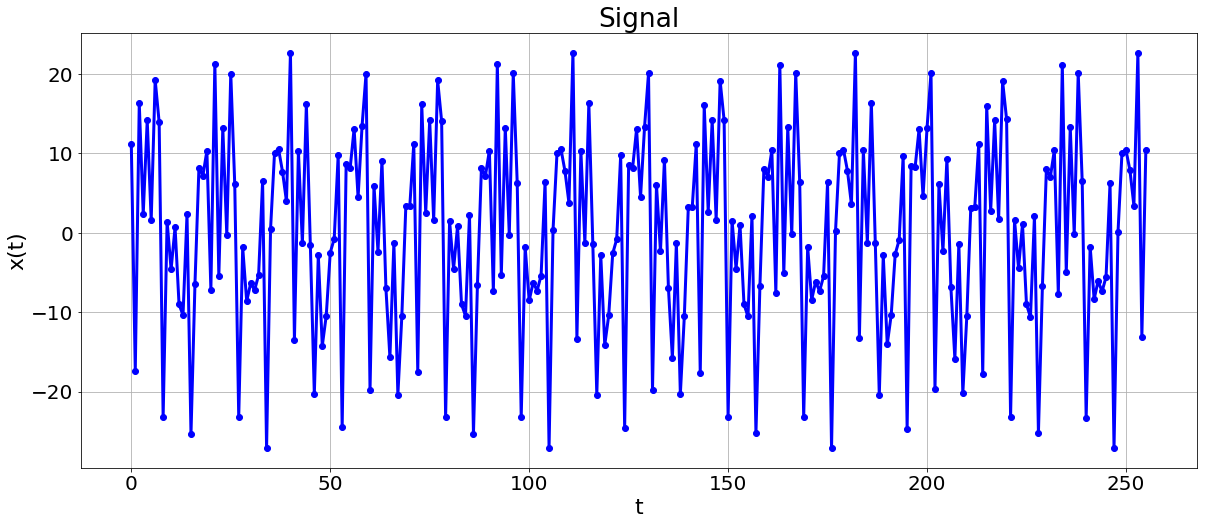

Shape of coef table:  (256, 256)
Size (not zero value):  32896


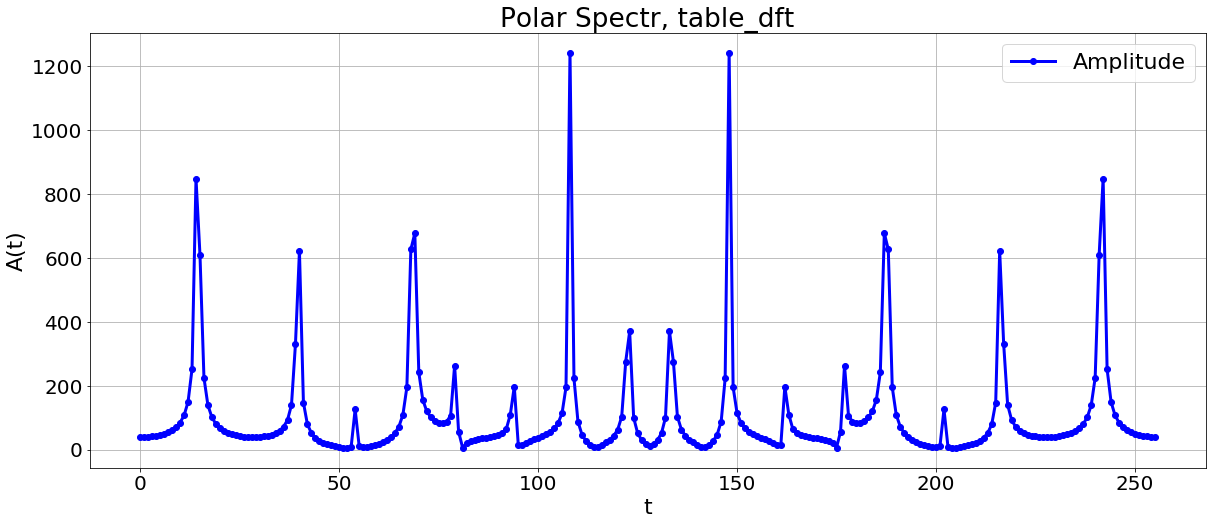

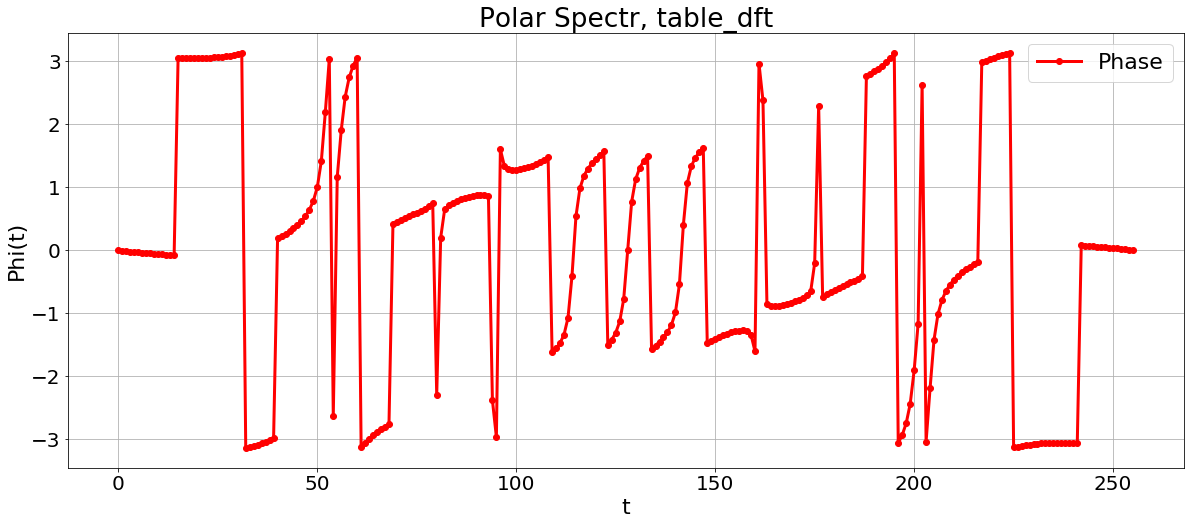

In [37]:
signal_1 = generate_signal(8, 256, 2000)

#Uncoment appropriative code block for run task or lab:

#Task on 2.1 lab
lab2(signal_1, 'table_dft')

###Furie tranformations and task for 2.1 lab.

In [38]:
def lab2(signal, method):
    """
    Method for draw polar spectr for task for 2.1 lab 
    """
    plot = draw(signal, "t", "x(t)", "Signal", "X(t)", "blue")
    plt.grid()
    plt.show()
    if method == 'dft':
        spectr = dft(signal)
    elif method == 'fft':
        spectr = fft(signal)
    else:
        spectr = table_dft(signal)
    polar_spectr = np.array(list(map(lambda x: cmath.polar(x), spectr)))
    ampl = draw(polar_spectr[:, 0], "t", "A(t)", "Polar Spectr, "+method, "Amplitude", "blue")
    plt.legend(handles=[ampl], loc='upper right')
    plt.grid()
    plt.show()
    phase = draw(polar_spectr[:, 1], "t", "Phi(t)", "Polar Spectr, "+method, "Phase", "red")
    plt.legend(handles=[phase], loc='upper right')
    plt.grid()
    plt.show()

In [39]:
def dft(signal):
    N = len(signal)
    spectr = []
    for p in range(N):
        R, I = 0, 0
        for k in range(N):
            R += signal[k]*cos(2*pi*p*k/N)
            I += signal[k]*sin(2*pi*p*k/N)
        spectr.append(complex(R, -I))
    return spectr

In [40]:
def table_dft(signal, half=True):
    """
    Table method task for 2.1 lab and print table shape
    """
    N = len(signal)
    coef_matrix = np.zeros((N, N), dtype=complex)
    #Creation N*N/2 coef table if half == True else - full table. Lower triangular matrix
    for p in range(N):
        for k in range(N):
            if half and k>p:
                break
            coef_matrix[p][k] = complex(cos(2*pi*p*k/N), -sin(2*pi*p*k/N))
    # print table shape
    print("Shape of coef table: ", coef_matrix.shape)
    print("Size (not zero value): ", len(coef_matrix[coef_matrix != 0]))
    spectr = []
    for p in range(N):
        C = complex(0,0)
        for k in range(N):
            if half and k>p:
                C += signal[k]*coef_matrix[k][p]
            else: 
                C += signal[k]*coef_matrix[p][k]
        spectr.append(C)
    return spectr

###Signal generation

In [41]:
def generate_signal(n, N, W):
    generated_signal = np.zeros(N)
    start = time.clock()
    for i in range(n):
        fi = 2*pi*random.random()
        A = random.randint(0, 10)
        w = W-i*W/(n)
        garmonika = []
        for j in range(N):
            x = A*sin(w*j+fi)
            generated_signal[j] += x
#             garmonika.append(x)
#         plt.plot(range(N), garmonika, label='garmonika {0}'.format(i))
#         plt.legend(loc='upper right')
#         plt.grid()
#         plt.show()

    lead_time = time.clock() - start
    time_string = "Execution time: {0}".format(lead_time)
    #print(time_string)
    #write_file(time_string)
    #upload_to_drive("time.txt")
    return generated_signal

In [42]:
def draw(arr, x_label, y_label, title, legend, color, file_name=None):
    result, = plt.plot(range(len(arr)), arr, '-o', label=legend, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    return result

In [43]:
import random
from math import *
import matplotlib.pyplot as plt
import numpy as np
import time
from __future__ import print_function
import pickle
import os.path
import cmath
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from apiclient.http import MediaFileUpload

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams['lines.linewidth'] = 3
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=22)
plt.rc('lin')